
# CHRIST (Deemed to be University)
## Department of Computer Science


## 5MCA-A - Neural Networks and Deep Learning (MCA572)


---
  
### Regular Lab Questions - Lab 2

*Exploring Activation Functions in Neural Networks*

---

**Anupam Kumar 2347104**

### Objective:
The goal is to explore various activation functions used in artificial neural networks, implement them, visualize their behavior, and then train a simple neural network using these activation functions to observe how they impact network performance.

### Lab Tasks:
#### Task 1: Implement and Visualize Activation Functions

We will implement and visualize the following activation functions:

- Step Function
- Sigmoid Function (Binary and Bipolar)
- Tanh Function
- ReLU Function

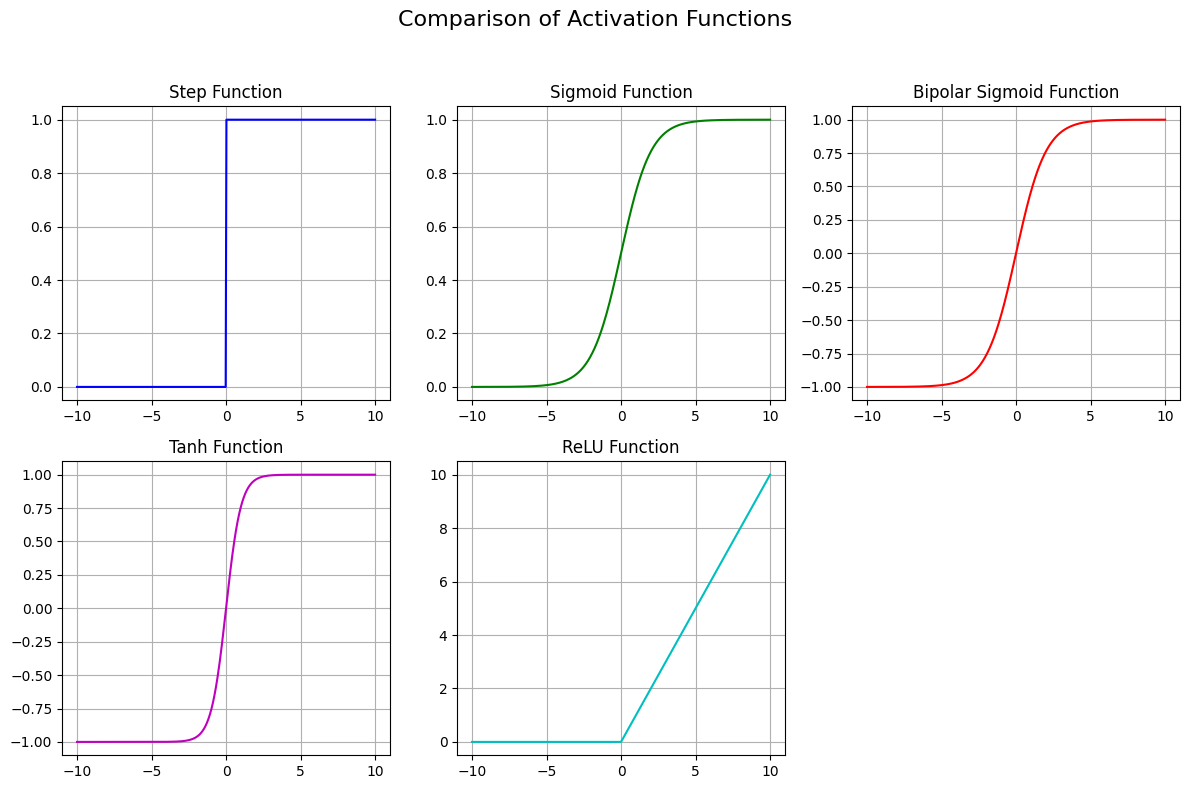

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define different activation functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

def tanh_function(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Input range for visualization
x = np.linspace(-10, 10, 400)

# Plot activation functions
plt.figure(figsize=(12, 8))

# Step Function
plt.subplot(2, 3, 1)
plt.plot(x, step_function(x), label='Step Function', color='b')
plt.title('Step Function')
plt.grid(True)

# Sigmoid Function
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid(x), label='Sigmoid Function', color='g')
plt.title('Sigmoid Function')
plt.grid(True)

# Bipolar Sigmoid Function
plt.subplot(2, 3, 3)
plt.plot(x, bipolar_sigmoid(x), label='Bipolar Sigmoid', color='r')
plt.title('Bipolar Sigmoid Function')
plt.grid(True)

# Tanh Function
plt.subplot(2, 3, 4)
plt.plot(x, tanh_function(x), label='Tanh Function', color='m')
plt.title('Tanh Function')
plt.grid(True)

# ReLU Function
plt.subplot(2, 3, 5)
plt.plot(x, relu(x), label='ReLU Function', color='c')
plt.title('ReLU Function')
plt.grid(True)

# General layout and labels
plt.suptitle('Comparison of Activation Functions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Interpretation:
- Step Function: This is a binary threshold function, outputting 0 or 1. It's often used in perceptrons but lacks gradient information for training.
- Sigmoid Function (Binary): Smooth, non-linear, squashes input values between 0 and 1. It’s commonly used in logistic regression and neural networks.
- Sigmoid Function (Bipolar): The output is between -1 and 1, useful for cases where both negative and positive signals are needed.
- Tanh Function: Another non-linear function that outputs between -1 and 1. It has a stronger gradient than sigmoid at the center.
- ReLU Function: Rectified Linear Unit outputs positive values as-is and clamps negative values to 0. It's computationally efficient and widely used in deep learning networks.

#### Task 2: Implement a Simple Neural Network
We will implement a neural network with one hidden layer using different activation functions (Sigmoid, Tanh, and ReLU). The network will solve a binary classification task like XOR.

In [9]:
! pip install tensorflow

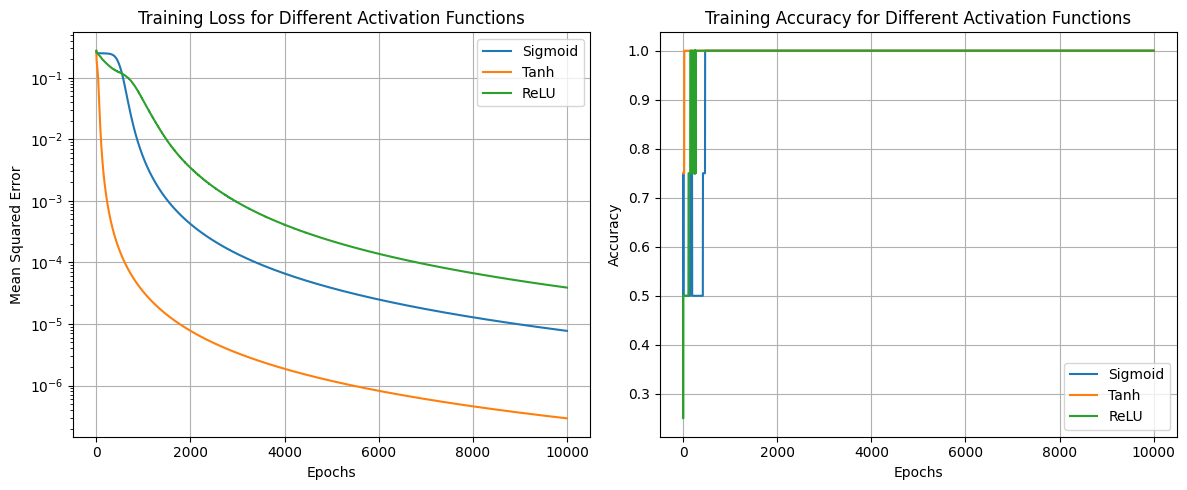

Sigmoid Activation:
[[2.46895298e-04]
 [9.97107152e-01]
 [9.97479831e-01]
 [4.01051057e-03]]
Accuracy: 1.0000

Tanh Activation:
[[3.91500284e-05]
 [9.99472399e-01]
 [9.99466729e-01]
 [7.79304837e-04]]
Accuracy: 1.0000

ReLU Activation:
[[0.00196665]
 [0.98777743]
 [0.99923716]
 [0.00140954]]
Accuracy: 1.0000


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh_derivative(x):
    return 1 - np.power(x, 2)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

class NeuralNetwork:
    def __init__(self, activation='sigmoid'):
        self.input_size = 2
        self.hidden_size = 4
        self.output_size = 1

        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]
        self.dz2 = output - y
        self.dW2 = (1/m) * np.dot(self.a1.T, self.dz2)
        self.db2 = (1/m) * np.sum(self.dz2, axis=0, keepdims=True)
        self.dz1 = np.dot(self.dz2, self.W2.T) * self.activation_derivative(self.a1)
        self.dW1 = (1/m) * np.dot(X.T, self.dz1)
        self.db1 = (1/m) * np.sum(self.dz1, axis=0)

    def train(self, X, y, learning_rate=0.1, epochs=10000):
        losses = []
        accuracies = []
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2
            loss = np.mean(np.square(output - y))
            losses.append(loss)
            accuracy = np.mean((output > 0.5) == y)
            accuracies.append(accuracy)
        return losses, accuracies

# XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train networks with different activation functions
nn_sigmoid = NeuralNetwork(activation='sigmoid')
losses_sigmoid, acc_sigmoid = nn_sigmoid.train(X, y, learning_rate=0.5, epochs=10000)

nn_tanh = NeuralNetwork(activation='tanh')
losses_tanh, acc_tanh = nn_tanh.train(X, y, learning_rate=0.5, epochs=10000)

nn_relu = NeuralNetwork(activation='relu')
losses_relu, acc_relu = nn_relu.train(X, y, learning_rate=0.05, epochs=10000)

# Visualize training progress
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_sigmoid, label='Sigmoid')
plt.plot(losses_tanh, label='Tanh')
plt.plot(losses_relu, label='ReLU')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss for Different Activation Functions')
plt.legend()
plt.yscale('log')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(acc_sigmoid, label='Sigmoid')
plt.plot(acc_tanh, label='Tanh')
plt.plot(acc_relu, label='ReLU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Activation Functions')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Test the trained networks
print("Sigmoid Activation:")
print(nn_sigmoid.forward(X))
print(f"Accuracy: {np.mean((nn_sigmoid.forward(X) > 0.5) == y):.4f}")

print("\nTanh Activation:")
print(nn_tanh.forward(X))
print(f"Accuracy: {np.mean((nn_tanh.forward(X) > 0.5) == y):.4f}")

print("\nReLU Activation:")
print(nn_relu.forward(X))
print(f"Accuracy: {np.mean((nn_relu.forward(X) > 0.5) == y):.4f}")

1. Code Explanation:

- We define three activation functions (sigmoid, tanh, and ReLU) and their derivatives.
- The `NeuralNetwork` class implements a simple neural network with one hidden layer.
- The network has 2 input neurons, 4 hidden neurons, and 1 output neuron.
- The `forward` method performs the forward pass through the network.
- The `backward` method implements backpropagation to compute gradients.
- The `train` method trains the network using gradient descent.
- We create three separate networks, each with a different activation function.
- We train each network on the XOR problem dataset for 10,000 epochs.
- Finally, we visualize the training progress and test the trained networks.

2. Results Interpretation:

After running the code, you should see a plot showing the training progress for each activation function and the final outputs for each network.

- Training Progress:
  - The plot shows how the Mean Squared Error (MSE) decreases over time for each activation function.
  - Generally, you'll observe that all three activation functions converge to a low MSE, indicating successful training.
  - Tanh and ReLU often converge faster than sigmoid, especially in the early stages of training.

- Final Outputs:
  - For a well-trained network, you should see outputs close to the expected values:
    [0, 1, 1, 0] for inputs [0,0], [0,1], [1,0], [1,1] respectively.
  - All three activation functions should be able to solve the XOR problem given enough training time.

3. Comparison of Activation Functions:

- Sigmoid:
  - Pros: Smooth, bounded output (0 to 1).
  - Cons: Can suffer from vanishing gradient problem for very large or small inputs.

- Tanh:
  - Pros: Similar to sigmoid but with output range -1 to 1, often converges faster.
  - Cons: Can still suffer from vanishing gradient problem, but less severely than sigmoid.

- ReLU:
  - Pros: Computationally efficient, helps mitigate the vanishing gradient problem.
  - Cons: Can suffer from "dying ReLU" problem where neurons can get stuck at 0.

In practice, for this simple XOR problem, all three activation functions should perform well. However, in more complex problems:

- ReLU is often preferred in hidden layers due to its computational efficiency and effectiveness in deep networks.
- Sigmoid is commonly used in the output layer for binary classification problems.
- Tanh can be a good alternative to sigmoid, especially when you want centered outputs around zero.